# Plot Vote Transfers on the Political Compass

In [1]:
#draw a graph of the political compass, tracking a PR-STV vote
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## read file select row number to plot vote transfer

In [23]:
constituency="Meath2002"
my_file="Meath2002-14P7-r-25000irreg.csv"
row_num=92
my_csv='../data/processed/'+my_file

#read in data (setting 1st row as header)
df = pd.read_csv(my_csv, header=[0]) # na_values=["Missing"], header=[1])

#set column names as first line

#df.head()
print("Print Data Frame (df.head)")
#print(df.head(10))
print("Print Column names")
print(df.columns)

#drop the numbers column 
df = df.drop(df.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#drop last 4 columns
df = df.iloc[:, :-4]

print(df.columns)

Print Data Frame (df.head)
Print Column names
Index(['Unnamed: 0', 'FF', 'FG', 'NP', 'FF.1', 'FG.1', 'FG.2', 'NPL', 'NP.1',
       'NP.2', 'GP', 'NPR', 'SF', 'FF.2', 'LB', 'maxValues', 'Euclid Dist',
       'Avg. Euc. Dist', 'Seq'],
      dtype='object')
Index(['FF', 'FG', 'NP', 'FF.1', 'FG.1', 'FG.2', 'NPL', 'NP.1', 'NP.2', 'GP',
       'NPR', 'SF', 'FF.2', 'LB'],
      dtype='object')


In [24]:
# get the party initials (1 characters) from the column names i.e. remove .1 .2 L Retc
#print(df.columns)
partiesList= list(df.columns)
#del partiesList[-1]
print(partiesList)
partiesList2=[]
for pl in partiesList:
    #print(pl[:2] )
    partiesList2.append(pl[:2])
print(partiesList2)

['FF', 'FG', 'NP', 'FF.1', 'FG.1', 'FG.2', 'NPL', 'NP.1', 'NP.2', 'GP', 'NPR', 'SF', 'FF.2', 'LB']
['FF', 'FG', 'NP', 'FF', 'FG', 'FG', 'NP', 'NP', 'NP', 'GP', 'NP', 'SF', 'FF', 'LB']


In [25]:
row = list(df.loc[row_num])
print(row)


[nan, nan, nan, 4.0, 6.0, 2.0, nan, 7.0, 3.0, 5.0, nan, 1.0, nan, nan]


In [26]:
def getVotesParty(voterow, partieslegend):
    #convert a vote row into parties initials
    voteP=[]
    for v in range(len(voterow)):
        for w in range(len(voterow)):
            if voterow[w] == v+1:
                voteP.append(partieslegend[w])
    return(voteP)

In [27]:
#convert votes to order of parties voted for
dVote=getVotesParty(row,partiesList2)
print(dVote)

['SF', 'FG', 'NP', 'FF', 'GP', 'FG', 'NP']


  party  xaxis  yaxis
0    SP   -7.0   -2.5
1    SF   -4.5    1.0
2    GP   -1.0   -2.0
3    NP    0.0    0.0
4    LB    1.5   -0.5
5    FF    2.5    2.4
6    FG    3.5    2.5
7    PD    4.0    3.0
dfi ['SP', 'SF', 'GP', 'NP', 'LB', 'FF', 'FG', 'PD']
1 - SF (-4.5, 1.0)
2 - FG (3.5, 2.5)
3 - NP (0.0, 0.0)
4 - FF (2.5, 2.4)
5 - GP (-1.0, -2.0)
6 - FG (3.5, 2.5)
7 - NP (0.0, 0.0)
Euclidean distance between vote 1 and 2 is 8.139410298049853
Euclidean distance between vote 2 and 3 is 4.301162633521313
Euclidean distance between vote 3 and 4 is 3.4655446902326914
Euclidean distance between vote 4 and 5 is 5.622277118748239
Euclidean distance between vote 5 and 6 is 6.363961030678928
Euclidean distance between vote 6 and 7 is 4.301162633521313
Total Distance Travelled on Political Compass as a vote transfers  32.19351840475234
Average Distance Travelled on Political Compass of each vote transfers  5.365586400792057


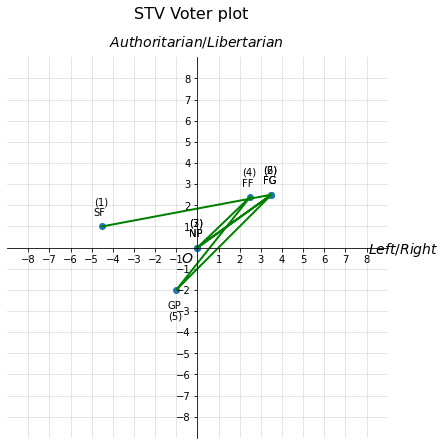

In [28]:
#set up the paramaters of the graph, axes and background.
xmin, xmax, ymin, ymax = -8, 8, -8, 8
ticks_frequency = 1
fig, ax = plt.subplots(figsize=(7,7), num="PR-STV Vote Traced") 
fig.patch.set_facecolor('#ffffff')
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('$Left/Right$', size=14, labelpad=-24, x=1.04, y=1)
ax.set_ylabel('$Authoritarian/Libertarian$', size=14, labelpad=-21, y=1.02, rotation=0)
 
plt.text(0.49, 0.49, r"$O$", ha='right', va='top',
    transform=ax.transAxes,
         horizontalalignment='center', fontsize=14)

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Add title
#fig.canvas.set_window_title('PR-STV Vote') #set above
fig.suptitle('STV Voter plot', fontsize=16)

#download compass data positioning irish political parties on the political spectrum
indata='../data/pc.csv'

#set column names
col_names = ['party', 'xaxis', 'yaxis']
#read in data
df = pd.read_csv(indata, na_values=["Missing"], names=col_names)
print(df)
points=[]
points = df.party
x=[] #x-axis coordinates
y=[] #y-axis coordinates
pt=[]

#populate two lists with the x and y - coordinates
for p in points:
    pt.append(df.party)
    x.append(df.xaxis)
    y.append(df.yaxis)

#Irregular Vote
#dVote= ['NP', 'SP', 'LB', 'SF', 'FF', 'GP', 'FG']
#Regular Vote
#dVote =['FG','FG','FF', 'GP']

#populate 3 lists with text, x co-ord and y co-ord
dfi = df.party.tolist()
print("dfi",dfi)
xi=[]
yi=[]
pp=[]
for d in dVote:
    inx=dfi.index(d)
    pp.append(df.iloc[inx].tolist()[0])
    xi.append(df.iloc[inx].tolist()[1])
    yi.append(df.iloc[inx].tolist()[2])
#print(df.iloc[inx].tolist()[2])
for ip in range(len(pp)):
    print(f"{ip+1} - {pp[ip]} ({xi[ip]}, {yi[ip]})")


#plt.plot((-6.0,-3.5,1,-1.2,1.5,1.5),(-3.5, 1.5,0.2,-1,-1.5,1.5), 'ro-')
#plt.plot(df.xaxis.to_numpy(),df.yaxis.to_numpy(), 'ro-')
plt.plot(xi,yi, color='green', linewidth=2, linestyle='solid')

#Calculate the eculidean distance a vote travels on the political spectrum
dist = 0
total_dist=0
for pl in range(len(pp)):
# initializing points in
# numpy arrays      
    if pl != (len(pp)-1):
        point1 = np.array((xi[pl],yi[pl]))
        point2 = np.array((xi[pl+1],yi[pl+1]))

#calculating Euclidean distance
# using linalg.norm()
        dist = np.linalg.norm(point1 - point2)
        print(f"Euclidean distance between vote {pl+1} and {pl+2} is {dist}")
        total_dist = total_dist + dist
        
avg_dist = total_dist/(len(pp)-1)    
print("Total Distance Travelled on Political Compass as a vote transfers ", total_dist)
print("Average Distance Travelled on Political Compass of each vote transfers ", avg_dist)


#print the vote number above/below the point on the plot
pt=df.party.to_numpy()
for m in range(len(pp)):
    n = xi[m]
    o = yi[m]
    ptext=pp[m]
    vno = "("+str(m+1)+")"

    if o >= 0:
        plt.text(n -0.4, o +0.5, ptext, fontsize=10)
        plt.text(n -0.4, o +1.0, vno, fontsize=10)      

    else:
        plt.text(n -0.4, o -0.9, ptext, fontsize=10)
        plt.text(n -0.4, o -1.4, vno, fontsize=10)      

#plot all the points
plt.scatter(xi,yi)
plt.show()